In [19]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import KMeans, SpectralClustering
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

%matplotlib inline

## Load data

In [2]:
column_items = ['movie id', 'movie title', 'release date', 'video release date', 'IMDb URL', 'unknown', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi','Thriller', 'War', 'Western']
items = pd.read_csv('ml-100k/u.item', delimiter='|',names=column_items, header = None, encoding='latin-1')
items.head()

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [3]:
genres = items.iloc[:, 5:]
genres.index = items['movie id']
genres.head()

,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movie id,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


## Dimension reduction adn classification

Now we try to classify the data. Since every movie has several genres, we choose to select first appeared genre as its only feature. We compare the dimension reduction ability of PCA, isomap and tsne.

In [4]:
genre_arr = genres.to_numpy()

In [5]:
genre_arr[0]

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [6]:
new_genre_arr = np.zeros((len(np.unique(items['movie id'])), len(genre_arr[0])))
for i in range(len(items['movie id'])):
    if np.sum(genre_arr[i]) ==1:
            new_genre_arr[i] = genre_arr[i]
    
    else:
        if np.sum(genre_arr[i]) >1:
            for j in range(len(genre_arr[0])):
                if genre_arr[i,j]==1:
                    new_genre_arr[i,j]=1
                    break

In [7]:
np.sum(new_genre_arr, axis = 1)

array([1., 1., 1., ..., 1., 1., 1.])

In [55]:
y_type = []
for i in range(len(items['movie id'])):
    for j in range(len(new_genre_arr[0])):
        if new_genre_arr[i,j]==1:
            y_type += [j]
y_type = np.asarray(y_type)

In [57]:
classes = np.unique(y_type)
classes

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18])

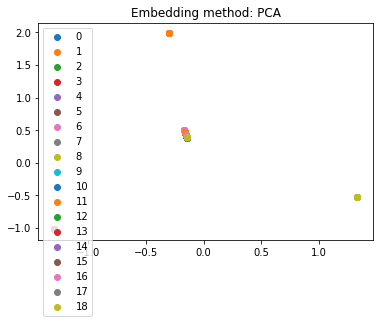

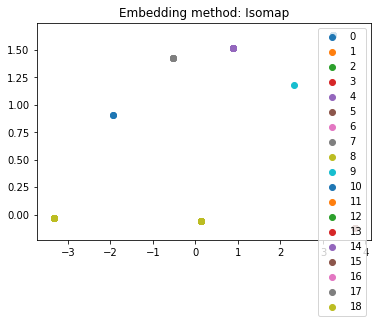

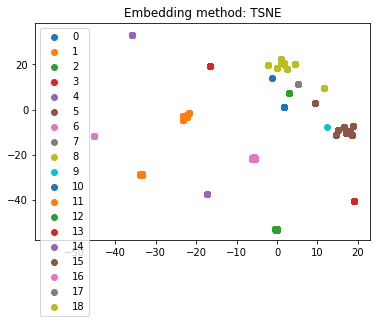

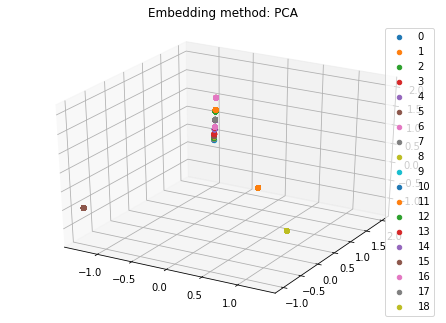

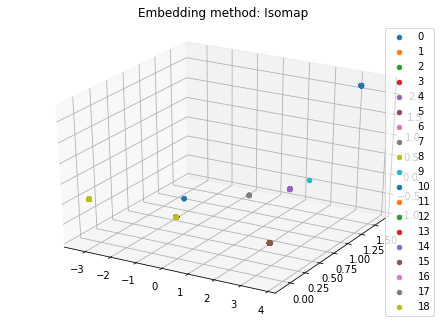

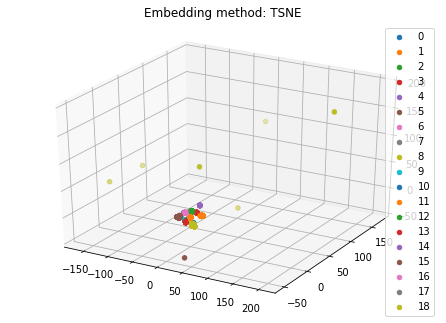

In [10]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, Isomap

# This cell can take a few minutes to run
run_this_cell = True

if run_this_cell:
    # In 2d
    embeddings = [PCA(n_components=2, copy=True, whiten=True, tol=1e-5),
                  Isomap(n_components=2, n_neighbors=5),
                  TSNE(n_components=2)]

    for embedding in embeddings:
        X_embedded = embedding.fit_transform(new_genre_arr)
        fig = plt.figure()
        for i in classes:
            mask = y_type == i
            plt.scatter(X_embedded[mask, 0], X_embedded[mask, 1], label=i)
        plt.legend()
        plt.title('Embedding method: '+ type(embedding).__name__)
        plt.show()

    # In 3d
    embeddings = [PCA(n_components=3, copy=True, whiten=True, tol=1e-5),
                  Isomap(n_components=3, n_neighbors=5),
                  TSNE(n_components=3)]

    for embedding in embeddings:
        X_embedded = embedding.fit_transform(new_genre_arr)
        fig = plt.figure()
        ax = Axes3D(fig)
        for i in classes:
            mask = y_type == i
            ax.scatter(X_embedded[mask, 0], X_embedded[mask, 1], X_embedded[mask, 2], label=i)
        ax.legend()
        ax.title.set_text('Embedding method: '+ type(embedding).__name__)
        plt.show()

From the graphs above, we can notice tsne did the best job, so we apply this method for further steps. Besides, it is easy to see the points that form a cluster normally close to each other and a cluster is usually far away from another oen, so we apply K-means for classification.

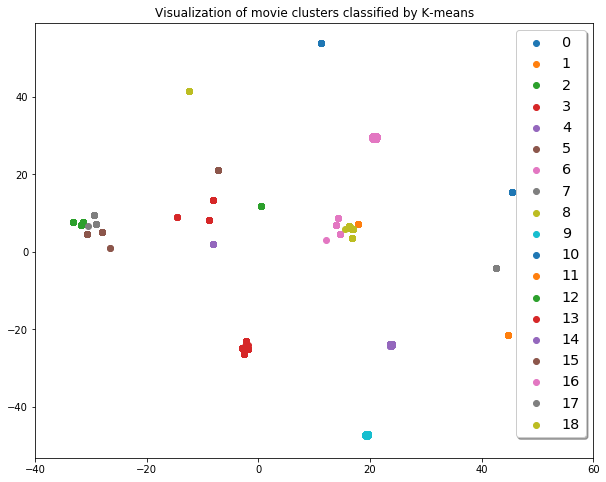

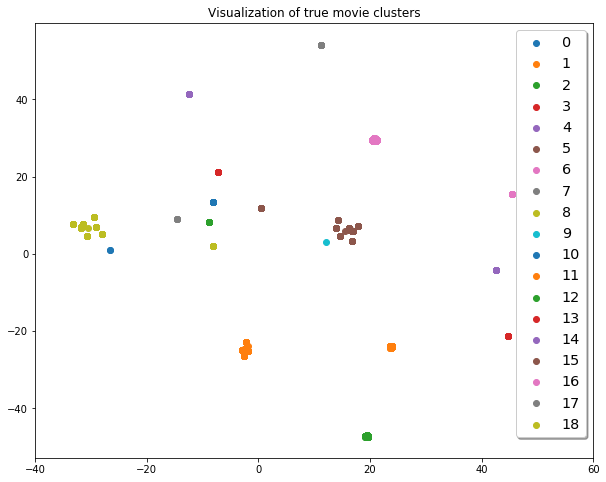

In [131]:
plt.figure(figsize=(10,8))
embedding = TSNE(n_components=2)
X_embedded = embedding.fit_transform(new_genre_arr)
km = KMeans(n_clusters=19)
y_pred = km.fit(X_embedded).labels_.astype(int)

for i in classes:
    mask = y_pred == i
    plt.scatter(X_embedded[mask, 0], X_embedded[mask, 1], label=i)

plt.xlim(-40, 60)
plt.legend(loc='upper right', shadow=True, fontsize='x-large')
plt.title("Visualization of movie clusters classified by K-means")
plt.show()


plt.figure(figsize=(10,8))
for i in classes:
    mask = y_type == i
    plt.scatter(X_embedded[mask,0], X_embedded[mask, 1], label=i)
    
plt.legend(loc='upper right', shadow=True, fontsize='x-large')
plt.xlim(-40, 60)
plt.title("Visualization of true movie clusters")
plt.show()

In [71]:
np.unique(y_pred)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18.])

<Figure size 720x576 with 0 Axes>

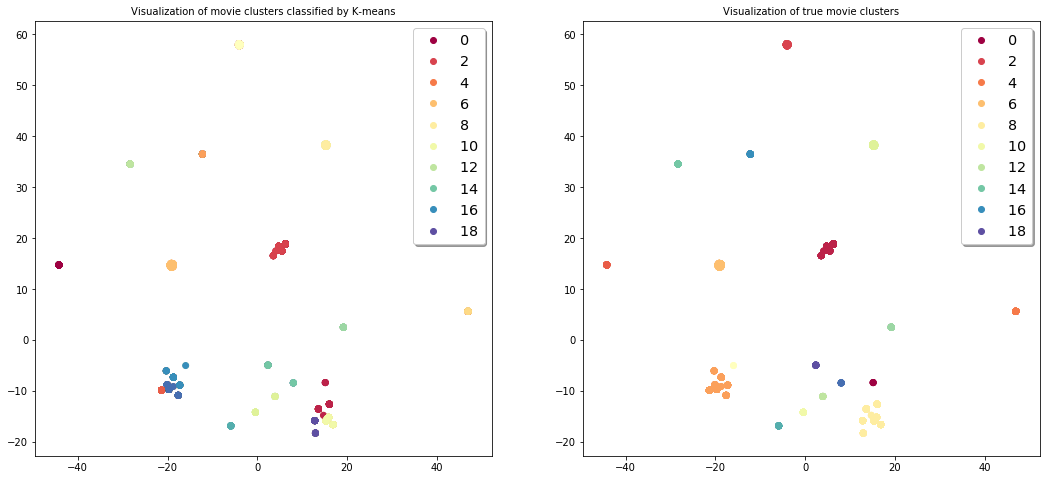

In [124]:
plt.figure(figsize=(10,8))
embedding = TSNE(n_components=2)
X_embedded = embedding.fit_transform(new_genre_arr)
km = KMeans(n_clusters=19)
y_pred = km.fit(X_embedded).labels_.astype(int)

fig, ax = plt.subplots(1, 2, figsize=(18,8)) 
scatter1 = ax[0].scatter(X_embedded[:,0], X_embedded[:,1], c=y_type, cmap=plt.cm.get_cmap("Spectral")) 
ax[0].scatter(X_embedded[:,0], X_embedded[:,1], c=y_pred, cmap=plt.cm.get_cmap("Spectral")) 
ax[0].set_title("Visualization of movie clusters classified by K-means", fontsize=10) 
ax[0].legend(*scatter1.legend_elements(),loc='upper right', shadow=True, fontsize='x-large')

scatter = ax[1].scatter(X_embedded[:,0], X_embedded[:,1], c=y_type, cmap=plt.cm.get_cmap("Spectral")) 
ax[1].scatter(X_embedded[:,0], X_embedded[:,1], c=y_type, cmap=plt.cm.get_cmap("Spectral")) 
ax[1].set_title("Visualization of true movie clusters", fontsize=10) 
ax[1].legend(*scatter.legend_elements(),loc='upper right', shadow=True, fontsize='x-large')
plt.show()

In [12]:
import scipy
def find_permutation(n_clusters, real_labels, labels):
    permutation=[]
    for i in range(n_clusters):
        idx = labels == i
        new_label=scipy.stats.mode(real_labels[idx])[0][0]  # Choose the most common label among data points in the cluster
        permutation.append(new_label)
    return permutation

In [13]:
permutation = find_permutation(19, y_type, km.labels_)
print(permutation)

[8, 5, 1, 11, 2, 7, 3, 6, 4, 15, 16, 14, 13, 8, 10, 18, 8, 8, 5]


In [14]:
from sklearn.metrics import accuracy_score
new_labels = [ permutation[label] for label in km.labels_]   # permute the labels
print("Accuracy score is", accuracy_score(y_type, new_labels))

Accuracy score is 0.9898929845422116


In [15]:
# Import `metrics` from `sklearn`
from sklearn import metrics

# Print out the confusion matrix with `confusion_matrix()`
print(metrics.confusion_matrix(y_type, y_pred))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   2   0   0   0   0
    0]
 [  0   0 251   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0  60   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0  35   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0  48   0   0   0   0   0   0   0   0   0
    0]
 [  0 167   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  259]
 [  0   0   0   0   0   0   0  74   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0  49   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [318   0   0   0   0   0   0   0   0   0   0   0   0  41   0   0  80  92
    0]
 [  0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  14   0   0   0
    0]
 [  0   0   0  62   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   

In [16]:
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, adjusted_mutual_info_score, silhouette_score
print('% 9s' % 'inertia   homo    compl  v-meas     ARI     AMI   silhouette')
print(' %i     %.3f   %.3f   %.3f    %.3f   %.3f   %.3f'
          %(km.inertia_,
      homogeneity_score(y_type, y_pred),
      completeness_score(y_type, y_pred),
      v_measure_score(y_type, y_pred),
      adjusted_rand_score(y_type, y_pred),
      adjusted_mutual_info_score(y_type, y_pred),
      silhouette_score(X_embedded, y_pred, metric='euclidean')))

inertia   homo    compl  v-meas     ARI     AMI   silhouette
 1253     0.988   0.797   0.882    0.655   0.789   0.861


/Users/jinhui/opt/anaconda3/envs/ntds_2019/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


In [75]:
from matplotlib.colors import ListedColormap

ListedColormap(['r','b','g'])

In [78]:
scatter.legend_elements()

([<matplotlib.lines.Line2D at 0x123e2fe48>,
 ['$\\mathdefault{0}$',
  '$\\mathdefault{2}$',
  '$\\mathdefault{4}$',
  '$\\mathdefault{6}$',
  '$\\mathdefault{8}$',
  '$\\mathdefault{10}$',
  '$\\mathdefault{12}$',
  '$\\mathdefault{14}$',
  '$\\mathdefault{16}$',
  '$\\mathdefault{18}$'])

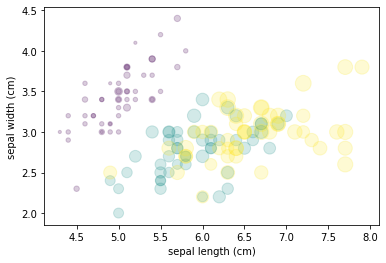

In [85]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T

plt.scatter(features[0], features[1], alpha=0.2,
            s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

In [86]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [91]:
y_pred

array([ 4,  2, 10, ..., 15,  3,  1])

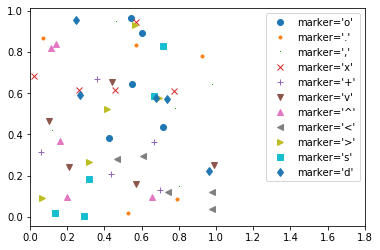

In [94]:
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
             label="marker='{0}'".format(marker))
plt.legend(numpoints=1)
plt.xlim(0, 1.8);